C:\Users\ahega\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


loading train data...
train size:  37500000
valid size:  2500000
test size :  18790469
Training...
preparing validation datasets


C:\Users\ahega\Anaconda3\lib\site-packages\lightgbm\basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\ahega\Anaconda3\lib\site-packages\lightgbm\basic.py:681: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


Training until validation scores don't improve for 30 rounds.
[10]	train's auc: 0.968766	valid's auc: 0.972926
[20]	train's auc: 0.970625	valid's auc: 0.975217
[30]	train's auc: 0.971093	valid's auc: 0.975535
[40]	train's auc: 0.97108	valid's auc: 0.975443
[50]	train's auc: 0.971593	valid's auc: 0.975804
[60]	train's auc: 0.971587	valid's auc: 0.975811
[70]	train's auc: 0.971542	valid's auc: 0.975718
[80]	train's auc: 0.971561	valid's auc: 0.97576
Early stopping, best iteration is:
[54]	train's auc: 0.971607	valid's auc: 0.975874

Model Report
bst1.best_iteration:  54
auc: 0.975874365542
[441.24966621398926]: model training time
Plot feature importances...


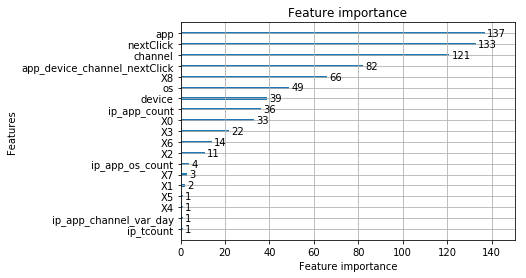

Predicting...
writing...
done...
loading train data...
train size:  37500000
valid size:  2500000
test size :  18790469
Training...
preparing validation datasets
Training until validation scores don't improve for 30 rounds.
[10]	train's auc: 0.969253	valid's auc: 0.970307
[20]	train's auc: 0.970206	valid's auc: 0.971384
[30]	train's auc: 0.970604	valid's auc: 0.971608
[40]	train's auc: 0.970551	valid's auc: 0.971534
[50]	train's auc: 0.97066	valid's auc: 0.971597
[60]	train's auc: 0.97066	valid's auc: 0.971596
[70]	train's auc: 0.970856	valid's auc: 0.971797
[80]	train's auc: 0.970899	valid's auc: 0.971823
[90]	train's auc: 0.970914	valid's auc: 0.971801
[100]	train's auc: 0.971	valid's auc: 0.971835
[110]	train's auc: 0.971004	valid's auc: 0.971847
[120]	train's auc: 0.971013	valid's auc: 0.971847
[130]	train's auc: 0.971029	valid's auc: 0.971857
[140]	train's auc: 0.971039	valid's auc: 0.971881
[150]	train's auc: 0.971083	valid's auc: 0.971927
[160]	train's auc: 0.971095	valid's auc:

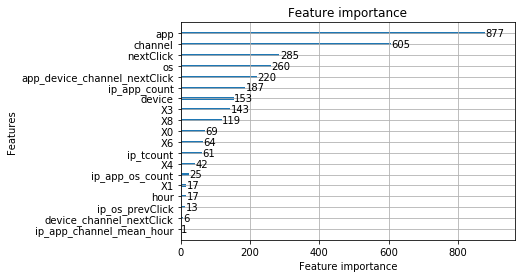

Predicting...
writing...
done...
loading train data...
train size:  37500000
valid size:  2500000
test size :  18790469
Training...
preparing validation datasets
Training until validation scores don't improve for 30 rounds.
[10]	train's auc: 0.969569	valid's auc: 0.959564
[20]	train's auc: 0.969702	valid's auc: 0.959612
[30]	train's auc: 0.970091	valid's auc: 0.960198
[40]	train's auc: 0.970072	valid's auc: 0.960227
[50]	train's auc: 0.970267	valid's auc: 0.96099
[60]	train's auc: 0.970442	valid's auc: 0.961273
[70]	train's auc: 0.970421	valid's auc: 0.961231
[80]	train's auc: 0.970414	valid's auc: 0.961223
[90]	train's auc: 0.971892	valid's auc: 0.962204
[100]	train's auc: 0.971902	valid's auc: 0.962194
[110]	train's auc: 0.971863	valid's auc: 0.962401
[120]	train's auc: 0.971872	valid's auc: 0.962419
[130]	train's auc: 0.971822	valid's auc: 0.962488
Early stopping, best iteration is:
[101]	train's auc: 0.971906	valid's auc: 0.962192

Model Report
bst1.best_iteration:  101
auc: 0.9621

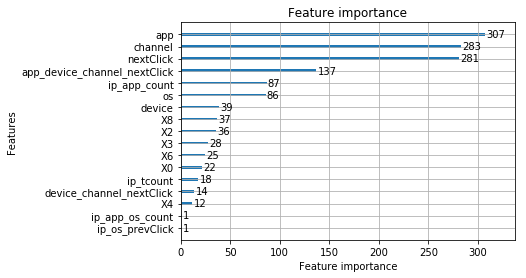

Predicting...
writing...
done...
loading train data...
train size:  37500000
valid size:  2500000
test size :  18790469
Training...
preparing validation datasets
Training until validation scores don't improve for 30 rounds.
[10]	train's auc: 0.963697	valid's auc: 0.963242
[20]	train's auc: 0.964951	valid's auc: 0.96452
[30]	train's auc: 0.965058	valid's auc: 0.964674
[40]	train's auc: 0.965029	valid's auc: 0.964626
[50]	train's auc: 0.965143	valid's auc: 0.964907
[60]	train's auc: 0.965174	valid's auc: 0.96487
[70]	train's auc: 0.965101	valid's auc: 0.964705
[80]	train's auc: 0.965127	valid's auc: 0.96473
Early stopping, best iteration is:
[54]	train's auc: 0.965189	valid's auc: 0.964918

Model Report
bst1.best_iteration:  54
auc: 0.964917731378
[426.1520164012909]: model training time
Plot feature importances...


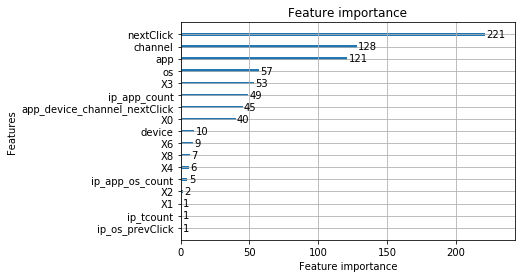

Predicting...
writing...
done...


In [1]:
import pandas as pd
import time
import numpy as np
from sklearn.cross_validation import train_test_split
import lightgbm as lgb
import gc
import matplotlib.pyplot as plt
import os
%matplotlib inline

# debug = 0 if submission else debug 
debug= 0
if debug:
    print('*** debug parameter set: this is a test run for debugging purposes ***')  
    
def lgb_modelfit_nocv(params, dtrain, dvalid, predictors, target='target', objective='binary', metrics='auc',
                 feval=None, early_stopping_rounds=20, num_boost_round=3000, verbose_eval=10, categorical_features=None):
    lgb_params = {
        'boosting_type': 'rf',
        'objective': objective,
        'metric':metrics,
        'learning_rate': 0.15,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 15,  # we should let it be smaller than 2^(max_depth)
        'max_depth': 5,  # -1 means no limit
        'min_child_samples': 180,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7839190373652398,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.8707045749521953,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 4,
        'verbose': 0,
        'metric':metrics
    }

    lgb_params.update(params)

    print("preparing validation datasets")

    xgtrain = lgb.Dataset(dtrain[predictors].values, label=dtrain[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical_features
                          )
    xgvalid = lgb.Dataset(dvalid[predictors].values, label=dvalid[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical_features
                          )

    evals_results = {}

    bst1 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[xgtrain, xgvalid], 
                     valid_names=['train','valid'], 
                     evals_result=evals_results, 
                     num_boost_round=num_boost_round,
                     early_stopping_rounds=early_stopping_rounds,
                     verbose_eval=10, 
                     feval=feval)

    print("\nModel Report")
    print("bst1.best_iteration: ", bst1.best_iteration)
    print(metrics+":", evals_results['valid'][metrics][bst1.best_iteration-1])
    del xgtrain, xgvalid
    gc.collect()
    return (bst1,bst1.best_iteration)

def DO(ftrain, fvalid, ftest):
    dtypes = {
            'ip'            : 'uint32',
            'app'           : 'uint16',
            'device'        : 'uint16',
            'os'            : 'uint16',
            'channel'       : 'uint16',
            'is_attributed' : 'uint8',
            'click_id'      : 'uint32',
            'hour'          : 'uint8',
            'day'           : 'uint8',
            'minute'        : 'uint8',
            'X0'            : 'int64',
            'X1'            : 'int64',
            'X2'            : 'int64',
            'X3'            : 'int64',
            'X4'            : 'int64',
            'X5'            : 'int64',
            'X6'            : 'int64',
            'X7'            : 'int64',
            'X8'            : 'int64',
            'devicenext_Clicl' : 'float32',
            'device_channel_nextClick' : 'float32',
            'app_device_channel_nextClick': 'float32',
            'device_hour_nextClick': 'float32',
            'ip_channel_prevClick': 'float32',
            'ip_os_prevClick': 'float32',
            'nextClick': 'int64',
            'nextClick_shift': 'float64',
            'nextClick_shift_shift': 'float64',
            'nextClick_shiftback': 'float64',
            'ip_tcount': 'int64',
            'ip_app_count': 'int64',
            'ip_app_os_count': 'int64',
            'ip_tchan_count': 'float64',
            'ip_app_os_var': 'float64',
            'ip_app_channel_var_day': 'float64',
            'ip_app_channel_mean_hour': 'float64'
            }

    predictors = ['device_nextClick', 'device_channel_nextClick', 'app_device_channel_nextClick', 'device_hour_nextClick',
                  'ip_channel_prevClick', 'ip_os_prevClick', 'nextClick', 'nextClick_shift', 'nextClick_shift_shift',
                  'nextClick_shiftback', 'app', 'device', 'os', 'channel', 'hour', 'ip_tcount', 'ip_tchan_count',
                  'ip_app_count', 'ip_app_os_count', 'ip_app_os_var', 'ip_app_channel_var_day', 'ip_app_channel_mean_hour',
                  'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
    usecols = ['device_nextClick', 'device_channel_nextClick', 'app_device_channel_nextClick', 'device_hour_nextClick',
                  'ip_channel_prevClick', 'ip_os_prevClick', 'nextClick', 'nextClick_shift', 'nextClick_shift_shift',
                  'nextClick_shiftback', 'app', 'device', 'os', 'channel', 'hour', 'day', 'ip_tcount', 'ip_tchan_count',
                  'ip_app_count', 'ip_app_os_count', 'ip_app_os_var', 'ip_app_channel_var_day', 'ip_app_channel_mean_hour',
                  'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'is_attributed', 'click_id']
    usecolstest = ['device_nextClick', 'device_channel_nextClick', 'app_device_channel_nextClick', 'device_hour_nextClick',
                  'ip_channel_prevClick', 'ip_os_prevClick', 'nextClick', 'nextClick_shift', 'nextClick_shift_shift',
                  'nextClick_shiftback', 'app', 'device', 'os', 'channel', 'hour', 'day', 'ip_tcount', 'ip_tchan_count',
                  'ip_app_count', 'ip_app_os_count', 'ip_app_os_var', 'ip_app_channel_var_day', 'ip_app_channel_mean_hour',
                  'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

    target = 'is_attributed'
    categorical = ['app', 'device', 'os', 'channel', 'hour']
    
    print('loading train data...')
    train_df = pd.read_csv(ftrain, usecols=usecols)
    val_df = pd.read_csv(fvalid, usecols=usecols)
    test_df  = pd.read_csv(ftest, usecols=usecolstest)
    
    print("train size: ", len(train_df))
    print("valid size: ", len(val_df))
    print("test size : ", len(test_df))

    gc.collect()

    print("Training...")
    start_time = time.time()

    params = {
        'learning_rate': 0.15,
        #'is_unbalance': 'true', # replaced with scale_pos_weight argument
        'num_leaves': 15,  # 2^max_depth - 1
        'max_depth': 5,  # -1 means no limit
        'min_child_samples': 185,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 100,  # Number of bucketed bin for feature values
        'subsample': 0.7839190373652398,  # Subsample ratio of the training instance.
        'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.8707045749521953,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'scale_pos_weight':180.53004597457985 # because training data is extremely unbalanced 
    }
    (bst,best_iteration) = lgb_modelfit_nocv(params, 
                            train_df, 
                            val_df, 
                            predictors, 
                            target, 
                            objective='binary', 
                            metrics='auc',
                            early_stopping_rounds=30, 
                            verbose_eval=True, 
                            num_boost_round=2000, 
                            categorical_features=categorical)

    print('[{}]: model training time'.format(time.time() - start_time))
    from datetime import datetime as dt
    datetime = dt.now().strftime('_%Y_%m%d_%H%M_%S')
    subt = pd.DataFrame()
    subt['is_attributed'] = bst.predict(train_df[predictors], num_iteration=best_iteration)
    fname = 'sub_rf_train_BayesOpt' + datetime + '.csv'
    subt.to_csv(fname, index=False)
    del subt
    gc.collect()
    del train_df
    gc.collect()

    subt = pd.DataFrame()
    subt['is_attributed'] = bst.predict(val_df[predictors], num_iteration=best_iteration)
    fname = 'sub_rf_valid_BayesOpt' + datetime +  '.csv'
    subt.to_csv(fname, index=False)
    del subt; gc.collect()
    del val_df; gc.collect()
    
    print('Plot feature importances...')
    ax = lgb.plot_importance(bst, max_num_features=100)
    plt.show()

    print("Predicting...")
    sub = pd.DataFrame()
    click_id = pd.read_csv("../input/test.csv", usecols=['click_id'])
    sub['click_id'] = click_id.astype('int')
    del click_id; gc.collect()
    sub['is_attributed'] = bst.predict(test_df[predictors],num_iteration=best_iteration)
    from datetime import datetime as dt
    datetime = dt.now().strftime('_%Y_%m%d_%H%M_%S')
    if not debug:
        print("writing...")
        fname = 'sub_rf_BayesOpt' + datetime +  '.csv'
        sub.to_csv(fname, index=False)
    print("done...")
    del bst, sub
    gc.collect()
    del test_df
    gc.collect()

pathlist = [['./rawdata_train_From12000_2018_0503_0151_25.csv', './rawdata_valid_From12000_2018_0503_0151_25.csv', './Dataset_xgdt_test_From1200_2018_0503_0215_36.csv'],
            ['./rawdata_train_From12000_2018_0503_0410_16.csv', './rawdata_valid_From12000_2018_0503_0410_16.csv', './Dataset_xgdt_test_From1200_2018_0503_0436_26.csv'],
            ['./rawdata_train_From12000_2018_0503_0622_23.csv', './rawdata_valid_From12000_2018_0503_0622_23.csv', './Dataset_xgdt_test_From1200_2018_0503_0646_04.csv'],
            ['./rawdata_train_From12000_2018_0503_0843_57.csv', './rawdata_valid_From12000_2018_0503_0843_57.csv', './Dataset_xgdt_test_From1200_2018_0503_0910_04.csv']
           ]
for paths in pathlist:
    ftrain = paths[0]
    fvalid = paths[1]
    ftest = paths[2]
    DO(ftrain, fvalid, ftest)
    gc.collect()
